# Student Performance indicator 

### Life Cycle of ML Project

- Understanding the Problem Statement
- Data Collection
- Data Checks to perform
- Exploratory data analysis
- Data Pre-Processing
- Model Training
- Choose best model

### 1) Problem statement
- This project understands how the student's performance (test scores) is affected by other variables such as Gender, Ethnicity, Parental level of education, Lunch and Test preparation course.


### 2) Data Collection
- Dataset Source - https://www.kaggle.com/datasets/spscientist/students-performance-in-exams?datasetId=74977
- The data consists of 8 column and 1000 rows.

### 2.1 Import Data and required packages

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')


In [5]:
df=pd.read_csv('data/data.csv')

### Show top 5 Records 

In [6]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


### Shape of Dataset

In [7]:
df.shape

(1000, 8)

### 3 Data checks to perform 
- Check Missing values
- Check Duplicates
- Check data type
- Check the number of unique values of each column
- Check statistics of data set
- Check various categories present in the different categorical column

### 3.1 Check Missing Values

In [8]:
df.isnull().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

### 3.2 Check Duplicates

In [9]:
df.duplicated().sum()

0

### 3.3 Check Data type

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


### 3.4 Check Number of Unique Values in each column

In [11]:
df.nunique()

gender                          2
race_ethnicity                  5
parental_level_of_education     6
lunch                           2
test_preparation_course         2
math_score                     81
reading_score                  72
writing_score                  77
dtype: int64

### 3.5 Check Statistics of Data

In [12]:
df.describe()

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


### Exploring Data

In [14]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [17]:
# defining numerical and categorical features
numerical_features=[feature for feature in df.columns if df[feature].dtype !='O']
Categorical_features=[feature for feature in df.columns if df[feature].dtype =='O']

print("we have {} categorical features : {}".format(len(Categorical_features),Categorical_features))
print("we have {} Numerical features : {}".format(len(numerical_features),numerical_features))


we have 5 categorical features : ['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch', 'test_preparation_course']
we have 3 Numerical features : ['math_score', 'reading_score', 'writing_score']


### Adding Columns for "Total Score" and "Average"

In [18]:
df['Total_Score']=df['math_score']+df['reading_score']+df['writing_score']
df['Average_Score']=df['Total_Score']/3

In [21]:
# finding how many students got full marks in all the three subjects
reading_full=df[df['reading_score']==100]['Average_Score'].count()
writing_full=df[df['writing_score']==100]['Average_Score'].count()
Maths_full=df[df['math_score']==100]['Average_Score'].count()

print('Number of people having full marks in Maths {}'.format(Maths_full))
print('Number of people having full marks in Reading {}'.format(reading_full))
print('Number of people having full marks in Writing {}'.format(writing_full))


Number of people having full marks in Maths 7
Number of people having full marks in Reading 17
Number of people having full marks in Writing 14


In [23]:
#  finding how many students got marks less than 20
reading_less_20 = df[df['reading_score'] <= 20]['Average_Score'].count()
writing_less_20 = df[df['writing_score'] <= 20]['Average_Score'].count()
math_less_20 = df[df['math_score'] <= 20]['Average_Score'].count()

print(f'Number of students with less than 20 marks in Maths: {math_less_20}')
print(f'Number of students with less than 20 marks in Writing: {writing_less_20}')
print(f'Number of students with less than 20 marks in Reading: {reading_less_20}')

Number of students with less than 20 marks in Maths: 4
Number of students with less than 20 marks in Writing: 3
Number of students with less than 20 marks in Reading: 1


### 4.Exploring Data (Visualization)

### Visualize average score distribution
- Histogram
- KDE

<Axes: xlabel='Average_Score', ylabel='Count'>

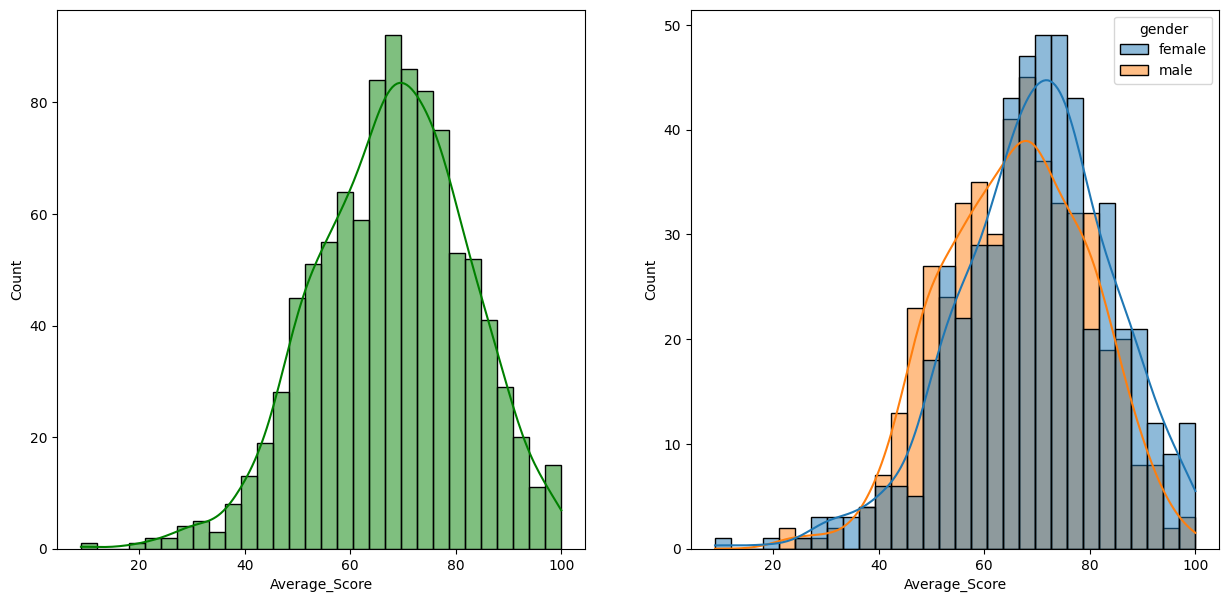

In [24]:
fig,axs = plt.subplots(1,2,figsize=(15,7))
plt.subplot(121)
sns.histplot(data=df,x='Average_Score',bins=30,kde=True,color='g')
plt.subplot(122)
sns.histplot(data=df,x='Average_Score',bins=30,kde=True,hue='gender')

<Axes: xlabel='Total_Score', ylabel='Count'>

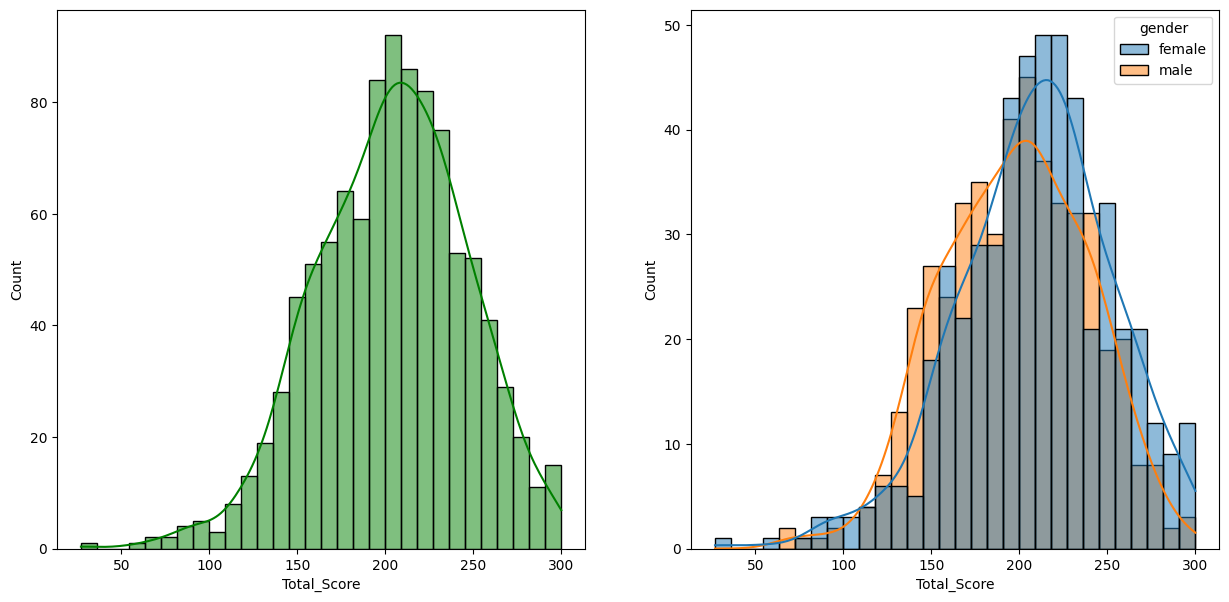

In [25]:
fig,axs = plt.subplots(1,2,figsize=(15,7))
plt.subplot(121)
sns.histplot(data=df,x='Total_Score',bins=30,kde=True,color='g')
plt.subplot(122)
sns.histplot(data=df,x='Total_Score',bins=30,kde=True,hue='gender')

Female students tends to perform well than male students

<Axes: xlabel='Average_Score', ylabel='Count'>

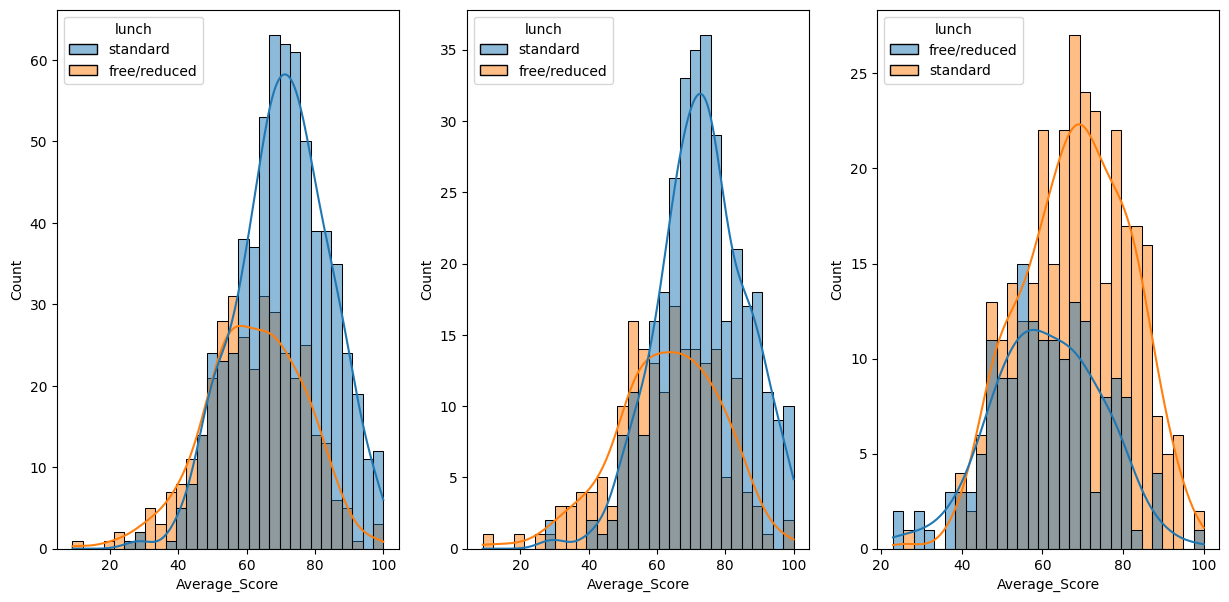

In [31]:
# check how lunch determines the outcome of total & average score.
fig,axs = plt.subplots(1,3,figsize=(15,7))
plt.subplot(131)
sns.histplot(data=df,x='Average_Score',bins=30,kde=True,hue='lunch')
plt.subplot(132)
sns.histplot(data=df[df['gender']=='female'],x='Average_Score',bins=30,kde=True,hue='lunch')
plt.subplot(133)
sns.histplot(data=df[df['gender']=='male'],x='Average_Score',bins=30,kde=True,hue='lunch')

standard lunch helps perform well in exam be is male or female

<Axes: xlabel='Average_Score', ylabel='Count'>

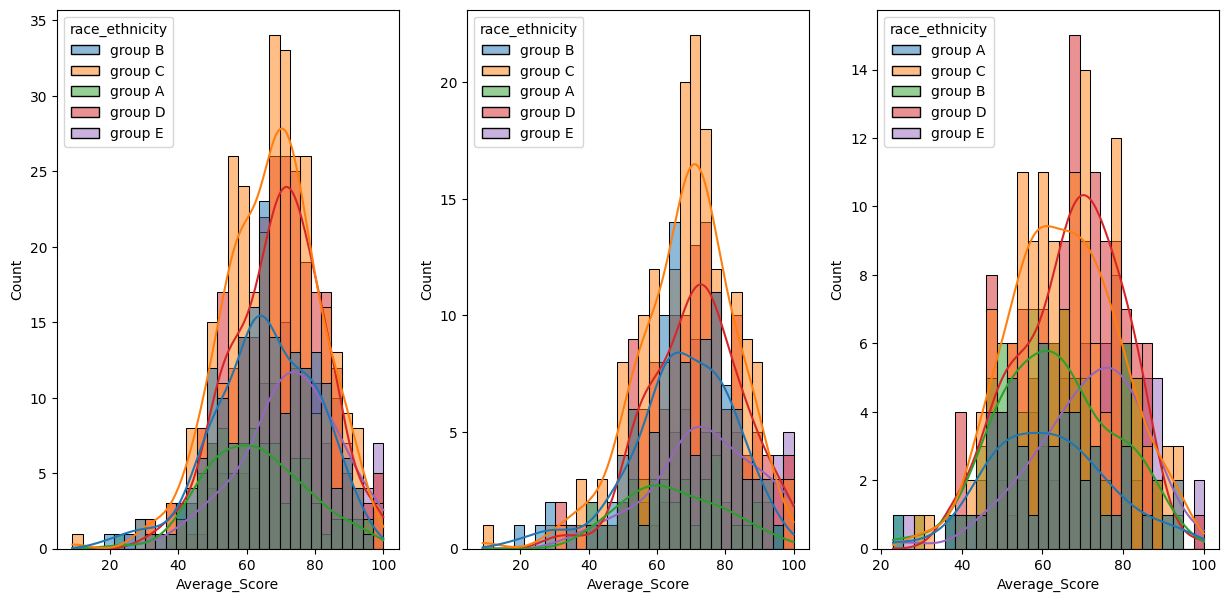

In [32]:
# checking how race/ethinicity determines the score of the student
fig,axs = plt.subplots(1,3,figsize=(15,7))
plt.subplot(131)
sns.histplot(data=df,x='Average_Score',bins=30,kde=True,hue='race_ethnicity')
plt.subplot(132)
sns.histplot(data=df[df['gender']=='female'],x='Average_Score',bins=30,kde=True,hue='race_ethnicity')
plt.subplot(133)
sns.histplot(data=df[df['gender']=='male'],x='Average_Score',bins=30,kde=True,hue='race_ethnicity')

Insights
- Group A, Group B and Group C tend to perform poor in exams

<Axes: ylabel='writing_score'>

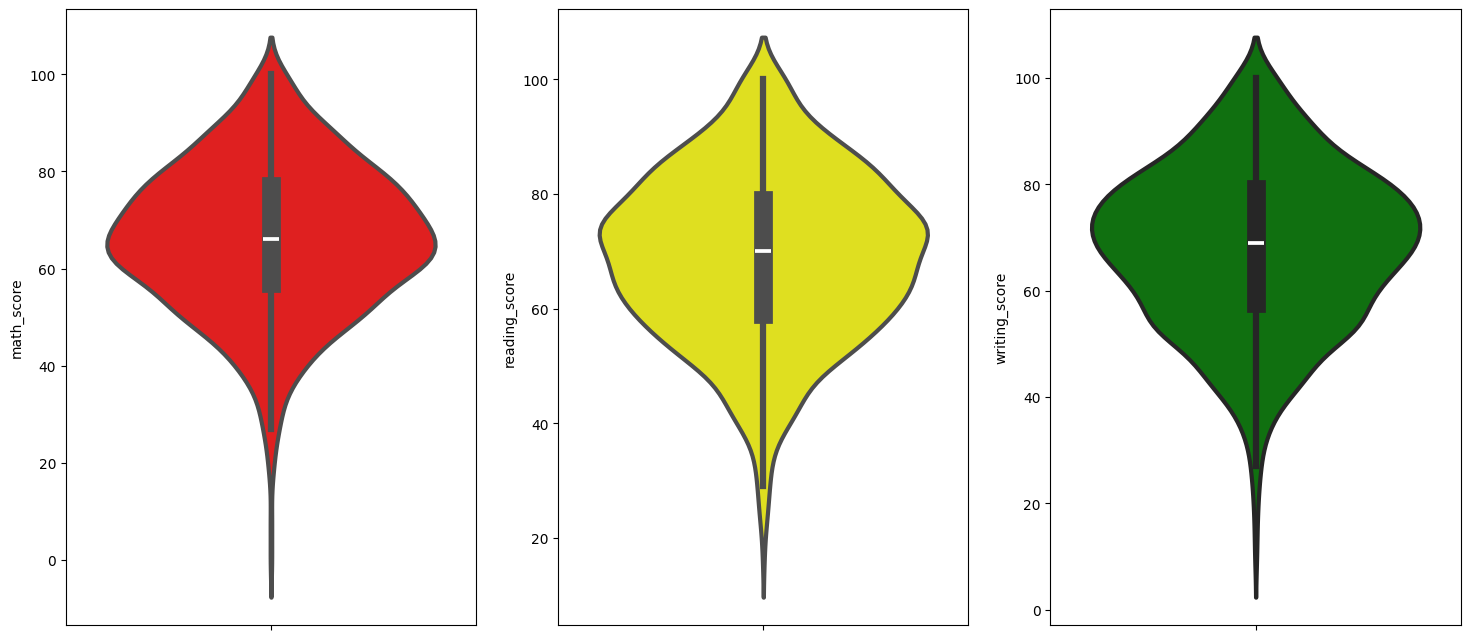

In [38]:
# creating violin plot : mixture of KDE and box plot
plt.figure(figsize=(18,8))
plt.subplot(1,3,1)
sns.violinplot(data=df,y='math_score',color='red',linewidth=3)
plt.subplot(1,3,2)
sns.violinplot(data=df,y='reading_score',color='yellow',linewidth=3)
plt.subplot(1,3,3)
sns.violinplot(data=df,y='writing_score',color='green',linewidth=3)


#### Insights
- From the above three plots its clearly visible that most of the students score in between 60-80 in Maths whereas in reading and writing most of them score from 50-80

<Axes: ylabel='math_score'>

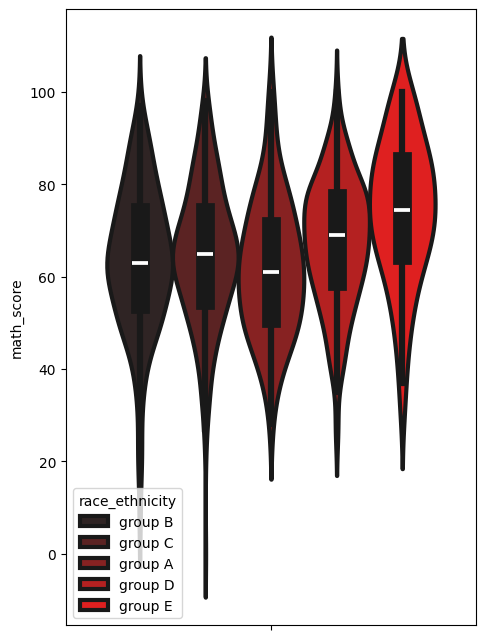

In [42]:
# creating violin plot : mixture of KDE and box plot, creating multiple violens 
plt.figure(figsize=(18,8))
plt.subplot(1,3,1)
sns.violinplot(data=df,y='math_score',color='red',linewidth=3,hue='race_ethnicity')

### 4.3 Multivariate Analysis using pieplot

In [51]:
size=df['parental_level_of_education'].value_counts()
size

parental_level_of_education
some college          226
associate's degree    222
high school           196
some high school      179
bachelor's degree     118
master's degree        59
Name: count, dtype: int64

(-1.25, 1.25, -1.25, 1.25)

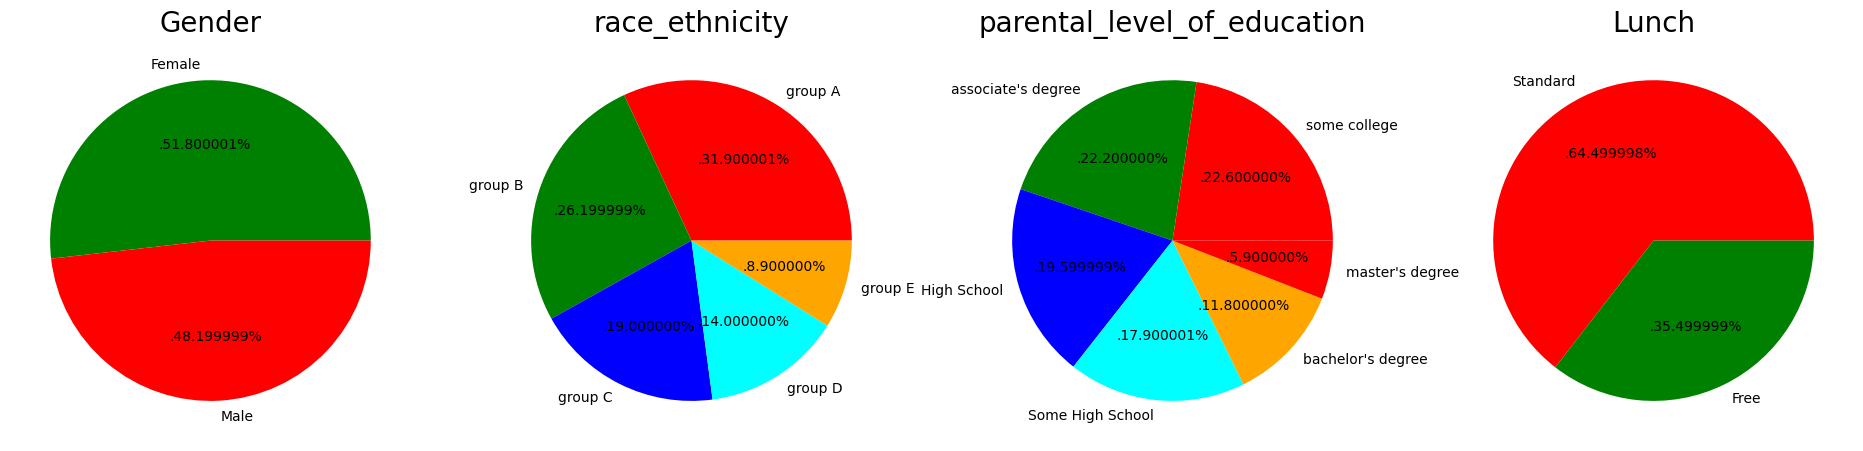

In [53]:
plt.figure(figsize=(30,12))

plt.subplot(1,5,1)
size=df['gender'].value_counts()
labels='Female','Male'
color=['green','red']

plt.pie(size, colors=color,labels=labels,autopct='.%2f%%')
plt.title('Gender',fontsize=20)
plt.axis('off')


plt.subplot(1,5,2)
size=df['race_ethnicity'].value_counts()
labels='group A','group B','group C','group D','group E'
color=['red', 'green', 'blue', 'cyan','orange']

plt.pie(size, colors=color,labels=labels,autopct='.%2f%%')
plt.title('race_ethnicity',fontsize=20)
plt.axis('off')


plt.subplot(1,5,3)
size=df['parental_level_of_education'].value_counts()
labels='some college',"associate's degree",'High School','Some High School',"bachelor's degree","master's degree"
color=['red', 'green', 'blue', 'cyan','orange']

plt.pie(size, colors=color,labels=labels,autopct='.%2f%%')
plt.title('parental_level_of_education',fontsize=20)
plt.axis('off')


plt.subplot(1, 5, 4)
size = df['lunch'].value_counts()
labels = 'Standard', 'Free'
color = ['red','green']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Lunch', fontsize = 20)
plt.axis('off')

#####  Insights
- Number of Male and Female students is almost equal
- Number students are greatest in Group A
- Number of students who have standard lunch are greater
- Number of students who have not enrolled in any test preparation course is greater
- Number of students whose parental education is "Some College" is greater followed closely by "Associate's Degree"

### 4.4 Feature wise Visualization

([<matplotlib.patches.Wedge at 0x1600a4fe5e0>,
 [Text(-0.06217041096298424, 1.0982417038160106, 'Female'),
  Text(0.06782226650507357, -1.1980818587083752, 'Male')],
 [Text(-0.033911133252536856, 0.5990409293541875, '51.8%'),
  Text(0.03956298879462625, -0.698881084246552, '48.2%')])

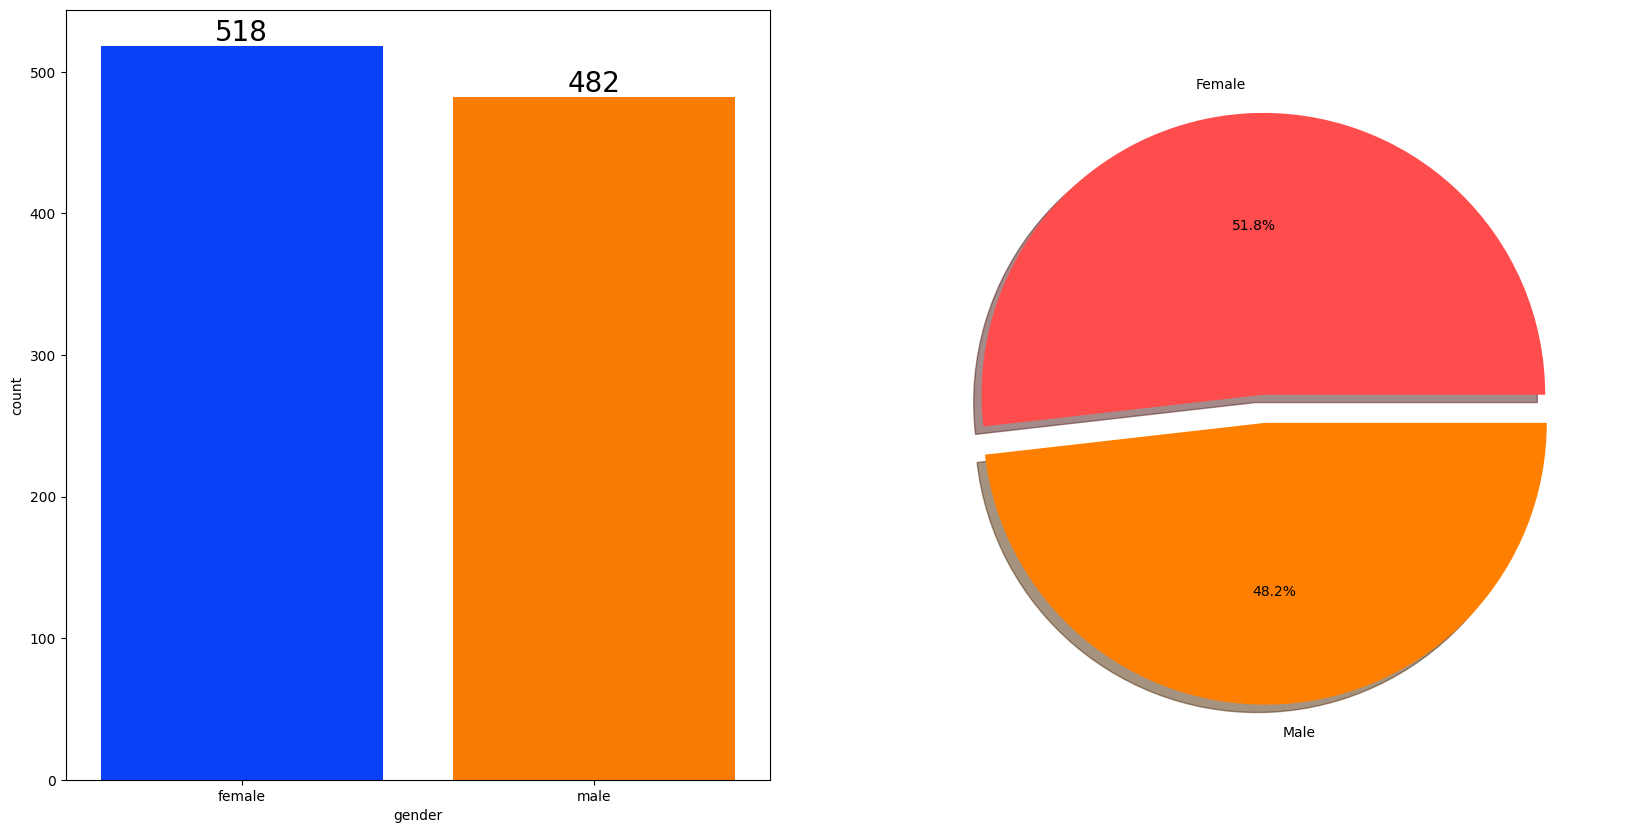

In [56]:
f,ax = plt.subplots(1,2,figsize=(20,10))
sns.countplot(data=df,x=df['gender'],palette='bright',ax=ax[0],saturation=0.95)

for containers in ax[0].containers:
    ax[0].bar_label(containers,color='black',size=20,)
    
plt.pie(x=df['gender'].value_counts(),colors=['#ff4d4d','#ff8000'],explode=[0,0.1],autopct='%1.1f%%',shadow=True,labels=['Female','Male'])

### Bivariate Analysis

In [58]:
gender_group = df.groupby('gender').mean(numeric_only=True)
gender_group

,math_score,reading_score,writing_score,Total_Score,Average_Score
gender,,,,,
female,63.633205,72.608108,72.467181,208.708494,69.569498
male,68.728216,65.473029,63.311203,197.512448,65.837483


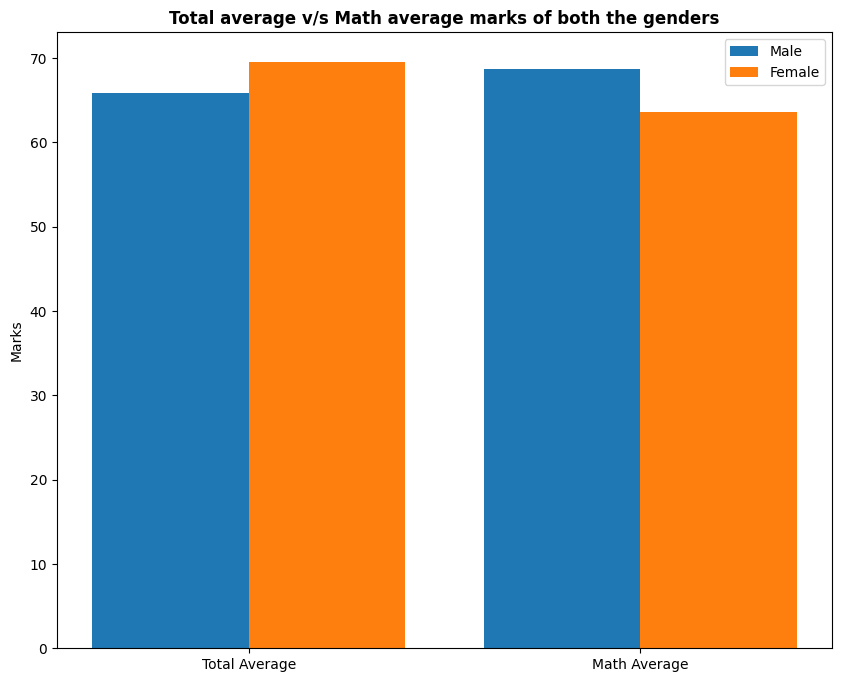

In [59]:
plt.figure(figsize=(10, 8))

X = ['Total Average','Math Average']

female_score=[gender_group['Average_Score'][0],gender_group['math_score'][0]]
male_score=[gender_group['Average_Score'][1],gender_group['math_score'][1]]


#  len of x=2, below code will arange the graphs on different position i.e. 0,1
X_axis = np.arange(len(X))
  
plt.bar(X_axis - 0.2, male_score, 0.4, label = 'Male')
plt.bar(X_axis + 0.2, female_score, 0.4, label = 'Female')
  
plt.xticks(X_axis, X)
plt.ylabel("Marks")
plt.title("Total average v/s Math average marks of both the genders", fontweight='bold')
plt.legend()
plt.show()

for the above graph we can see that overall females have higher score, whereas males have higher score in maths.

Similarly we can compare other categorical variable 

### 5. Conclusions
- Student's Performance is related with lunch, race, parental level education
- Females lead in pass percentage and also are top-scorers
- Student's Performance is not much related with test preparation course
- Finishing preparation course is benefitial.